In [110]:
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import deepcopy

In [111]:
color = ['r','g','b']
N = 1000
a = 1/math.sqrt(2)
U = np.matrix([[a,-a],[a,a]])
UT = U.T
lambda_1 = np.matrix([[4,0],[0,1]])
lambda_2 = np.matrix([[1,0],[0,5]])
I = np.matrix([[1,0],[0,1]])
sigma_1 = np.matmul(np.matmul(U,lambda_1),UT)
sigma_2 = np.matmul(np.matmul(U,lambda_2),UT)
sigma_3 = I
mu_1 = np.array([1, 0])
mu_2 = np.array([-1, 0])
mu_3 = np.array([0, -10])

mu = [mu_1,mu_2,mu_3]
sigma = [sigma_1,sigma_2,sigma_3]




(3000L, 2L)


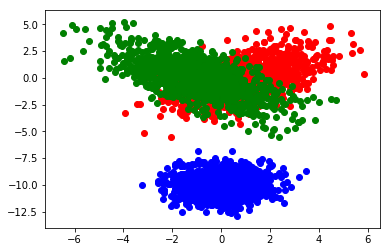

In [112]:
# generation of data
fig, ax = plt.subplots()
data = []
for i in range(3):
    x, y = np.random.multivariate_normal(mu[i], sigma[i], 1000).T
    data.extend(np.array([x,y]).T.tolist())
    ax.scatter(x,y, c=color[i])
data = np.asarray(data)
np.random.shuffle(data)
print(data.shape)

In [113]:
# Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [114]:
# centroids you are supposed to get
centroids = []
for i in range(3):
    centroids.append(np.mean(data[i], axis=0))
print(centroids)

[-0.5102421244270943, -5.249772224384042, -0.25642018622866364]


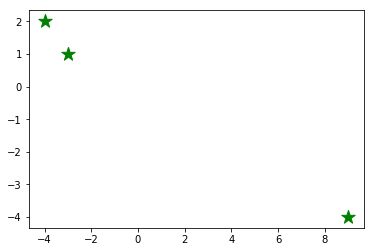

In [115]:
# Number of clusters
# random centroids
k = 3
# X coordinates of random centroids
C_x = np.random.randint(-6,10, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(-6,10, size=k)


C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [116]:
X = data
print(X.shape)
print(X)
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X))
print(clusters.shape)

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(error)



(3000L, 2L)
[[ -2.76224499   1.74176074]
 [  1.02099989 -11.52054434]
 [  0.02052311  -0.53336349]
 ...
 [ -1.04814119   0.5751595 ]
 [ -1.38370297  -3.17210092]
 [ -1.16945589 -10.56440456]]
(3000L,)
11.269427669584644


In [132]:

k = 3
while error != 0:
    for i in range(3000):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster  
    C_old = C
    for i in range(3):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(pts, axis=0)
    error = dist(C, C_old, None)

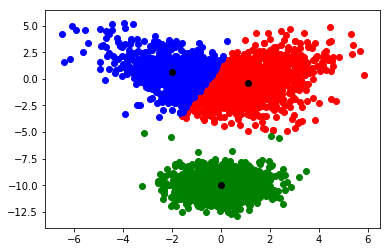

In [137]:

fig, ax = plt.subplots()

for i in range(k):
        pts = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(pts[:, 0], pts[:, 1], c=color[i])
ax.scatter(C[:, 0], C[:, 1], marker='o', c='black')